# Transfer Learning (Food 5K)

In [1]:
import glob
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!nvidia-smi -L
print(f'Tensorflow version: {tf.__version__}')

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)
Tensorflow version: 2.3.1


Download Food 5K dataset at https://lazyprogrammer.me/course_files/Food-5K.zip.

Orgnize the dataset as follows:

```bash
mkdir data
mkdir data/train
mkdir data/test
mkdir data/train/nonfood
mkdir data/train/food
mkdir data/test/nonfood
mkdir data/test/food
mv Food-5K/training/0*.jpg data/train/nonfood
mv Food-5K/training/1*.jpg data/train/food
mv Food-5K/validation/0*.jpg data/test/nonfood
mv Food-5K/validation/1*.jpg data/test/food
```

In [3]:
TRAIN_PATH = 'data/train'
TEST_PATH = 'data/test'
IMAGE_SIZE = [200, 200]
BATCH_SIZE = 128

train_images = glob.glob(f'{TRAIN_PATH}/*/*.jpg')
test_images = glob.glob(f'{TEST_PATH}/*/*.jpg')
folders = glob.glob(f'{TRAIN_PATH}/*')

K = len(folders)

gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input
)
train_gen = gen.flow_from_directory(
    TRAIN_PATH,
    shuffle=True,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)
test_gen = gen.flow_from_directory(
    TEST_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/10
24/24 [==============================] - 38s 2s/step - loss: 1.4044 - accuracy: 0.9280 - val_loss: 0.7431 - val_accuracy: 0.9710
Epoch 2/10
24/24 [==============================] - 35s 1s/step - loss: 0.4511 - accuracy: 0.9800 - val_loss: 0.7373 - val_accuracy: 0.9710
Epoch 3/10
24/24 [==============================] - 35s 1s/step - loss: 0.3982 - accuracy: 0.9827 - val_loss: 1.1735 - val_accuracy: 0.9540
Epoch 4/10
24/24 [==============================] - 35s 1s/step - loss: 0.3454 - accuracy: 0.9817 - val_loss: 0.5865 - val_accuracy: 0.9730
Epoch 5/10
24/24 [==============================] - 35s 1s/step - loss: 0.2207 - accuracy: 0.9883 - val_loss: 0.9575 - val_accuracy: 0.9690
Epoch 6/10
24/24 [==============================] - 35s 1s/step - loss: 0.2533 - accuracy: 0.9883 - val_loss: 0.9189 - val_accuracy: 0.9710
Epoch 7/10
24/24 [==============================] - 35s 1s/step - loss: 0.1802 - accuracy: 0.9897 - val_loss: 0.4452 - val_accuracy: 0.9770
Epoch 8/10
24/24 [==

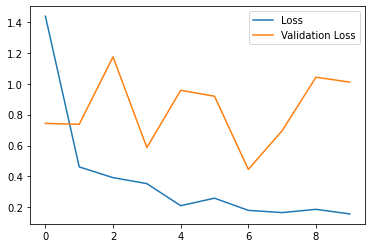

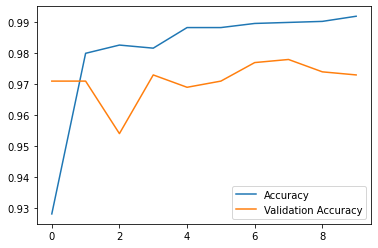

In [4]:
vgg16 = tf.keras.applications.vgg16.VGG16(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False
)
vgg16.trainable = False

x = tf.keras.layers.Flatten()(vgg16.output)
x = tf.keras.layers.Dense(K, activation='softmax')(x)
model = tf.keras.Model(inputs=vgg16.input, outputs=x)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(train_gen,
              validation_data=test_gen,
              epochs=10,
              steps_per_epoch=int(np.ceil(len(train_images) / BATCH_SIZE)),
              validation_steps=int(np.ceil(len(test_images) / BATCH_SIZE)))

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()